In [12]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import BatchNormalization
import keras.callbacks as cb
from matplotlib import pyplot as plt

In [2]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)
        
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


(60000, 28, 28)
(60000, 28, 28, 1)


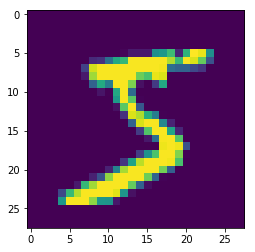

In [4]:
print(X_train.shape)
# (60000, 28, 28)

plt.imshow(X_train[0])

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
# (60000, 28, 28, 1)

In [5]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print(y_train.shape)
# (60000,)

print(y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)
# (60000, 10)

print(Y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [21]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

# ------------------

model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

In [7]:
def compile_and_fit_model(model, optimizer):
    history = LossHistory()
    
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    model.fit(X_train, Y_train, callbacks=[history], batch_size=32, epochs=5, verbose=1)
    
#     plot_losses(history.losses)
    
    score = model.evaluate(X_test, Y_test, verbose=1)
    print(score)

Epoch 1/5
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0316 - acc: 0.9902
Epoch 2/5
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0280 - acc: 0.9914
Epoch 3/5
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0257 - acc: 0.9915
Epoch 4/5
60000/60000 [==============================] - 190s 3ms/step - loss: 0.0263 - acc: 0.9915
Epoch 5/5
10000/10000 [==============================] - 8s 797us/step
[0.032683428573312905, 0.9911]
Epoch 1/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1909 - acc: 0.9492
Epoch 2/5
60000/60000 [==============================] - 228s 4ms/step - loss: 0.1870 - acc: 0.9512
Epoch 3/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.1820 - acc: 0.9542
Epoch 4/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.1846 - acc: 0.9536
Epoch 5/5
10000/10000 [==============================] - 12s 1ms/step
[0.06699410411044136, 0.9807

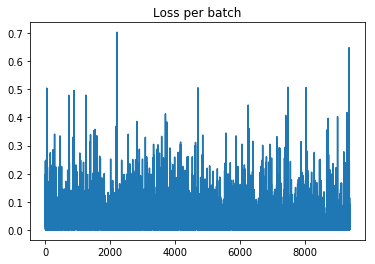

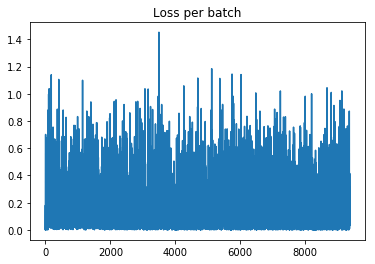

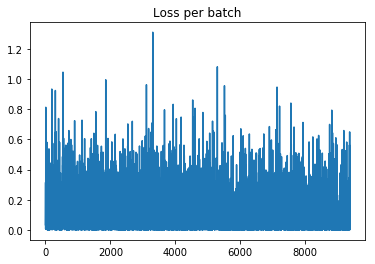

In [20]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_1, adam)

adam = Adam(lr=0.01)
compile_and_fit_model(model_1, adam)

adam = Adam(lr=0.005)
compile_and_fit_model(model_1, adam)

In [23]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_2, adam)

adam = Adam(lr=0.01)
compile_and_fit_model(model_2, adam)

adam = Adam(lr=0.005)
compile_and_fit_model(model_2, adam)

Epoch 1/5
60000/60000 [==============================] - 335s 6ms/step - loss: 0.2124 - acc: 0.9338
Epoch 2/5
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0818 - acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0610 - acc: 0.9823
Epoch 4/5
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0523 - acc: 0.9847
Epoch 5/5
10000/10000 [==============================] - 12s 1ms/step
[0.026956911560096795, 0.9916]
Epoch 1/5
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2787 - acc: 0.9279
Epoch 2/5
60000/60000 [==============================] - 316s 5ms/step - loss: 0.3048 - acc: 0.9231
Epoch 3/5
60000/60000 [==============================] - 308s 5ms/step - loss: 0.3098 - acc: 0.9258
Epoch 4/5
60000/60000 [==============================] - 318s 5ms/step - loss: 0.3325 - acc: 0.9249
Epoch 5/5
10000/10000 [==============================] - 14s 1ms/step
[0.12229771248615862, 0.9745]

In [8]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.7))

model_3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.7))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.7))
model_3.add(Dense(10, activation='softmax'))

# ------------------------

model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_4.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))

model_4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_4.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))

model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(10, activation='softmax'))

In [9]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_3, adam)

Epoch 1/5
60000/60000 [==============================] - 475s 8ms/step - loss: 0.4988 - acc: 0.8406
Epoch 2/5
60000/60000 [==============================] - 427s 7ms/step - loss: 0.2169 - acc: 0.9355
Epoch 3/5
60000/60000 [==============================] - 367s 6ms/step - loss: 0.1731 - acc: 0.9501
Epoch 4/5
60000/60000 [==============================] - 440s 7ms/step - loss: 0.1549 - acc: 0.9555
Epoch 5/5
10000/10000 [==============================] - 21s 2ms/step
[0.033080785063188525, 0.99]


In [10]:
adam = Adam(lr=0.001)
compile_and_fit_model(model_4, adam)

Epoch 1/5
60000/60000 [==============================] - 378s 6ms/step - loss: 0.1211 - acc: 0.9625
Epoch 2/5
60000/60000 [==============================] - 405s 7ms/step - loss: 0.0423 - acc: 0.9871
Epoch 3/5
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0305 - acc: 0.9907
Epoch 4/5
60000/60000 [==============================] - 410s 7ms/step - loss: 0.0239 - acc: 0.9923
Epoch 5/5
10000/10000 [==============================] - 17s 2ms/step
[0.024572335696592926, 0.9929]


In [13]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_5.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28, 1), padding="same"))
model_5.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(BatchNormalization())

model_5.add(Flatten())
model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.001)
compile_and_fit_model(model_4, adam)

Epoch 1/5
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0176 - acc: 0.9947
Epoch 2/5
60000/60000 [==============================] - 427s 7ms/step - loss: 0.0159 - acc: 0.9948
Epoch 3/5
60000/60000 [==============================] - 437s 7ms/step - loss: 0.0145 - acc: 0.9953
Epoch 4/5
60000/60000 [==============================] - 407s 7ms/step - loss: 0.0116 - acc: 0.9963
Epoch 5/5
10000/10000 [==============================] - 18s 2ms/step
[0.024864367902358662, 0.9938]
